Dataset Creation

I have created a file, which I'm saving as file.csv. The data has 9 attributes - Name, Age_Sex, Salary, Address, Email, Date_Joined, Position_Level, Phone Number.

In [ ]:
import pandas as pd
import numpy as np
import random
import datetime

# Generate random data
n = 20  # Number of rows

ID = range(1, n + 1)
Name = random.choices(['Alice', 'Bob', 'Catherine', 'David', 'Emily'], k=n)
Age_Sex = [f"{random.randint(20, 40)}-{random.choice(['M', 'F'])}" for _ in range(n)]
Salary = [f"{random.choice(['$', ''])}{random.randint(40000, 80000)}" for _ in range(n)]
Address = [f"{random.choice(['Street', 'Avenue', 'Lane'])} {random.randint(1, 100)}, {random.choice(['NY', 'CA', 'TX'])}" for _ in range(n)]
Email = [f"{Name[i]}{random.choice(['.com', '', '.org'])}@{random.choice(['gmail', 'yahoo', 'hotmail'])}" for i in range(n)]
Date_Joined = [datetime.date(random.randint(2010, 2022), random.randint(1, 12), random.randint(1, 28)).strftime('%Y-%m-%d') for _ in range(n)]
Position_Level = [f"{random.choice(['Manager', 'Developer', 'Analyst'])}_{random.randint(1, 3)}" for _ in range(n)]
Phone = [random.choice(['123-456-7890', '(123) 456-7890', '1234567890']) for _ in range(n)]

# Create a DataFrame
df = pd.DataFrame({
    'ID': ID,
    'Name': Name,
    'Age_Sex': Age_Sex,
    'Salary': Salary,
    'Address': Address,
    'Email': Email,
    'Date_Joined': Date_Joined,
    'Position_Level': Position_Level,
    'Phone': Phone
})

# Introduce a variety of missing values
missing_values = [None, 'N/A', '--', 'na', '']
for col in ['Name', 'Age_Sex', 'Salary', 'Address', 'Email', 'Phone']:
    df.loc[random.sample(range(n), 3), col] = random.choices(missing_values, k=3)

# Save DataFrame as a CSV file with a custom delimiter (`;`)
df.to_csv('file.csv',index=False)


**Step 1** : Import the data and perform basic exploration.

Forget we already have a df, so we'll start from reading 'file.csv' into a dataframe named df.

Explore the data

In [ ]:
# df =
df.head()

,ID,Name,Age_Sex,Salary,Address,Email,Date_Joined,Position_Level,Phone
0,1,David,33-F,42228,None,David.org@gmail,2019-06-13,Analyst_1,123-456-7890
1,2,Alice,38-F,$64697,N/A,Alice.org@hotmail,2010-02-19,Manager_1,123-456-7890
2,3,David,--,73703,"Avenue 76, TX",David.org@hotmail,2022-02-01,Analyst_2,123-456-7890
3,4,David,20-M,$42287,"Street 84, NY",David.com@yahoo,2014-05-08,Developer_1,na
4,5,Catherine,31-F,$58945,"Street 82, TX",Catherine.org@hotmail,2015-11-01,Developer_2,1234567890


We need to find any discrepancies by doing exploratory data analysis.


1.   Find dimension of data
2.   Look at the first and last 5 rows

What problems do we see with the data?



In [ ]:
df.shape

(20, 9)

In [ ]:
df.dtypes

Name                object
Sex               category
Age                  int64
Phone               object
Position_Level      object
Salary              object
Gender_code           int8
dtype: object

In [ ]:
df.head()

,ID,Name,Age_Sex,Salary,Address,Email,Date_Joined,Position_Level,Phone
0,1,David,33-F,42228,None,David.org@gmail,2019-06-13,Analyst_1,123-456-7890
1,2,Alice,38-F,$64697,N/A,Alice.org@hotmail,2010-02-19,Manager_1,123-456-7890
2,3,David,--,73703,"Avenue 76, TX",David.org@hotmail,2022-02-01,Analyst_2,123-456-7890
3,4,David,20-M,$42287,"Street 84, NY",David.com@yahoo,2014-05-08,Developer_1,na
4,5,Catherine,31-F,$58945,"Street 82, TX",Catherine.org@hotmail,2015-11-01,Developer_2,1234567890


In [ ]:
df.tail()

,ID,Name,Age_Sex,Salary,Address,Email,Date_Joined,Position_Level,Phone
15,16,Bob,None,41120,"Lane 72, TX",N/A,2022-03-16,Developer_3,(123) 456-7890
16,17,David,25-F,$68337,"Street 65, CA",David.org@hotmail,2018-11-08,Developer_1,N/A
17,18,Catherine,31-M,$79528,"Lane 77, CA",Catherine.com@gmail,2020-11-01,Developer_1,(123) 456-7890
18,19,N/A,--,55999,"Avenue 58, NY",Bob.com@hotmail,2014-07-25,Manager_3,None
19,20,Emily,35-M,$79340,"Avenue 12, CA",None,2013-01-16,Analyst_2,1234567890


Some problems we can see in the data :


1.   Columns combined together with Mixed data types. Ex- Age and Sex
2.   Salary column and Phone Number columns
3.   Different kinds of missing values. Ex - N/A, na,-





Step 2 Before we solve the issues we need to chane all invalid/missing values to NaN

In [ ]:
missing_value_types = [None, 'N/A', '--', 'na', '', np.NaN]
print(df.isin(missing_value_types).sum())

ID                0
Name              3
Age_Sex           3
Salary            3
Address           3
Email             3
Date_Joined       0
Position_Level    0
Phone             3
dtype: int64


Visualizing Missing Data

Optionally, use a library like Seaborn to create a heatmap of missing values.

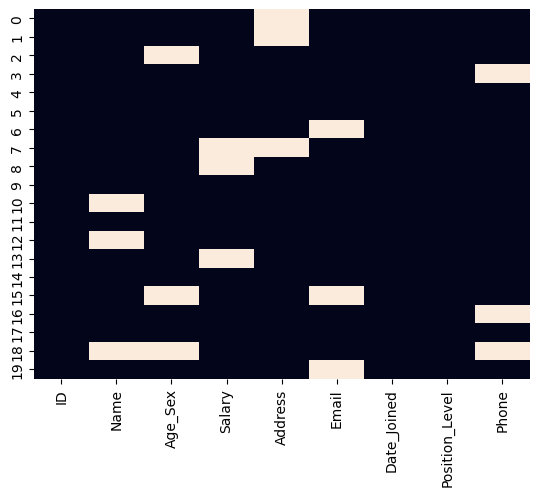

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isin(missing_value_types), cbar=False)
plt.show()


Change all to 'NaN'

In [ ]:
import numpy as np
df.replace([None, 'N/A', '--', 'na', ''],np.nan, inplace=True)
df

,ID,Name,Age_Sex,Salary,Address,Email,Date_Joined,Position_Level,Phone
0,1,David,33-F,42228,NaN,David.org@gmail,2019-06-13,Analyst_1,123-456-7890
1,2,Alice,38-F,$64697,NaN,Alice.org@hotmail,2010-02-19,Manager_1,123-456-7890
2,3,David,NaN,73703,"Avenue 76, TX",David.org@hotmail,2022-02-01,Analyst_2,123-456-7890
3,4,David,20-M,$42287,"Street 84, NY",David.com@yahoo,2014-05-08,Developer_1,NaN
4,5,Catherine,31-F,$58945,"Street 82, TX",Catherine.org@hotmail,2015-11-01,Developer_2,1234567890
5,6,Bob,22-M,$41557,"Street 7, NY",Bob.org@yahoo,2014-02-01,Manager_2,(123) 456-7890
6,7,Alice,39-M,$76833,"Street 16, NY",NaN,2018-01-24,Manager_2,1234567890
7,8,Emily,39-F,NaN,NaN,Emily@gmail,2022-06-06,Manager_2,123-456-7890
8,9,Catherine,22-F,NaN,"Lane 64, TX",Catherine.com@hotmail,2021-10-20,Analyst_2,1234567890
9,10,Alice,31-F,65129,"Avenue 3, CA",Alice.org@gmail,2016-09-03,Analyst_3,123-456-7890


**Step 2** : Solve the issues

1. Split Age and Sex

In [ ]:
df[['Age','Sex']] = df['Age_Sex'].str.split('-', expand=True)
df.drop('Age_Sex', axis=1, inplace=True)
df.head()

,ID,Name,Salary,Address,Email,Date_Joined,Position_Level,Phone,Age,Sex
0,1,David,42228,NaN,David.org@gmail,2019-06-13,Analyst_1,123-456-7890,33,F
1,2,Alice,$64697,NaN,Alice.org@hotmail,2010-02-19,Manager_1,123-456-7890,38,F
2,3,David,73703,"Avenue 76, TX",David.org@hotmail,2022-02-01,Analyst_2,123-456-7890,NaN,NaN
3,4,David,$42287,"Street 84, NY",David.com@yahoo,2014-05-08,Developer_1,NaN,20,M
4,5,Catherine,$58945,"Street 82, TX",Catherine.org@hotmail,2015-11-01,Developer_2,1234567890,31,F


We also need to change age to int datatype.

In [ ]:
df.dropna(subset=['Age'], inplace=True)
df['Age'] = df['Age'].astype(int)
df.head()

,ID,Name,Salary,Address,Email,Date_Joined,Position_Level,Phone,Age,Sex
0,1,David,42228,NaN,David.org@gmail,2019-06-13,Analyst_1,123-456-7890,33,F
1,2,Alice,$64697,NaN,Alice.org@hotmail,2010-02-19,Manager_1,123-456-7890,38,F
3,4,David,$42287,"Street 84, NY",David.com@yahoo,2014-05-08,Developer_1,NaN,20,M
4,5,Catherine,$58945,"Street 82, TX",Catherine.org@hotmail,2015-11-01,Developer_2,1234567890,31,F
5,6,Bob,$41557,"Street 7, NY",Bob.org@yahoo,2014-02-01,Manager_2,(123) 456-7890,22,M
6,7,Alice,$76833,"Street 16, NY",NaN,2018-01-24,Manager_2,1234567890,39,M
7,8,Emily,NaN,NaN,Emily@gmail,2022-06-06,Manager_2,123-456-7890,39,F
8,9,Catherine,NaN,"Lane 64, TX",Catherine.com@hotmail,2021-10-20,Analyst_2,1234567890,22,F
9,10,Alice,65129,"Avenue 3, CA",Alice.org@gmail,2016-09-03,Analyst_3,123-456-7890,31,F
10,11,NaN,60466,"Street 26, CA",David@yahoo,2020-08-15,Manager_2,123-456-7890,38,M


2. Solve Salary Issue

Remove '$' and convert to int

In [ ]:
#Get rid of '$' sign


df['Salary'].fillna(-1, inplace=True)

#Change datatype to int


df.head()

,ID,Name,Salary,Address,Email,Date_Joined,Position_Level,Phone,Age,Sex
0,1,David,42228,NaN,David.org@gmail,2019-06-13,Analyst_1,123-456-7890,33,F
1,2,Alice,$64697,NaN,Alice.org@hotmail,2010-02-19,Manager_1,123-456-7890,38,F
3,4,David,$42287,"Street 84, NY",David.com@yahoo,2014-05-08,Developer_1,NaN,20,M
4,5,Catherine,$58945,"Street 82, TX",Catherine.org@hotmail,2015-11-01,Developer_2,1234567890,31,F
5,6,Bob,$41557,"Street 7, NY",Bob.org@yahoo,2014-02-01,Manager_2,(123) 456-7890,22,M


3. Standardize Phone Number Column

In [ ]:
df['Phone'] = df['Phone'].str.replace(r'\D', '').str.slice(-10)
df

<ipython-input-12-ab7408978d40>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Phone'] = df['Phone'].str.replace(r'\D', '').str.slice(-10)


,ID,Name,Salary,Address,Email,Date_Joined,Position_Level,Phone,Age,Sex
0,1,David,42228,NaN,David.org@gmail,2019-06-13,Analyst_1,1234567890,33,F
1,2,Alice,$64697,NaN,Alice.org@hotmail,2010-02-19,Manager_1,1234567890,38,F
3,4,David,$42287,"Street 84, NY",David.com@yahoo,2014-05-08,Developer_1,NaN,20,M
4,5,Catherine,$58945,"Street 82, TX",Catherine.org@hotmail,2015-11-01,Developer_2,1234567890,31,F
5,6,Bob,$41557,"Street 7, NY",Bob.org@yahoo,2014-02-01,Manager_2,1234567890,22,M
6,7,Alice,$76833,"Street 16, NY",NaN,2018-01-24,Manager_2,1234567890,39,M
7,8,Emily,-1,NaN,Emily@gmail,2022-06-06,Manager_2,1234567890,39,F
8,9,Catherine,-1,"Lane 64, TX",Catherine.com@hotmail,2021-10-20,Analyst_2,1234567890,22,F
9,10,Alice,65129,"Avenue 3, CA",Alice.org@gmail,2016-09-03,Analyst_3,1234567890,31,F
10,11,NaN,60466,"Street 26, CA",David@yahoo,2020-08-15,Manager_2,1234567890,38,M


4. Reorder the columns

In [ ]:
# Reorder columns for better readability
df = df[['Name', 'Sex', 'Age', 'Phone', 'Position_Level', 'Salary']]
df.head()

,Name,Sex,Age,Phone,Position_Level,Salary
0,David,F,33,1234567890,Analyst_1,42228
1,Alice,F,38,1234567890,Manager_1,$64697
3,David,M,20,NaN,Developer_1,$42287
4,Catherine,F,31,1234567890,Developer_2,$58945
5,Bob,M,22,1234567890,Manager_2,$41557


Change categorical data

In [ ]:
df['Sex'] = df['Sex'].astype('category')
df['Gender_code'] = df['Sex'].cat.codes
df.head()

<ipython-input-14-0257f43e8c6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].astype('category')
<ipython-input-14-0257f43e8c6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender_code'] = df['Sex'].cat.codes


,Name,Sex,Age,Phone,Position_Level,Salary,Gender_code
0,David,F,33,1234567890,Analyst_1,42228,0
1,Alice,F,38,1234567890,Manager_1,$64697,0
3,David,M,20,NaN,Developer_1,$42287,1
4,Catherine,F,31,1234567890,Developer_2,$58945,0
5,Bob,M,22,1234567890,Manager_2,$41557,1


Step 4 Dealing with outliers

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Name            15 non-null     object  
 1   Sex             17 non-null     category
 2   Age             17 non-null     int64   
 3   Phone           15 non-null     object  
 4   Position_Level  17 non-null     object  
 5   Salary          17 non-null     object  
 6   Gender_code     17 non-null     int8    
dtypes: category(1), int64(1), int8(1), object(4)
memory usage: 974.0+ bytes


In [ ]:
df.describe()

,Age,Gender_code
count,17.000000,17.000000
mean,30.941176,0.529412
std,6.959441,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,31.000000,1.000000
75%,38.000000,1.000000
max,39.000000,1.000000


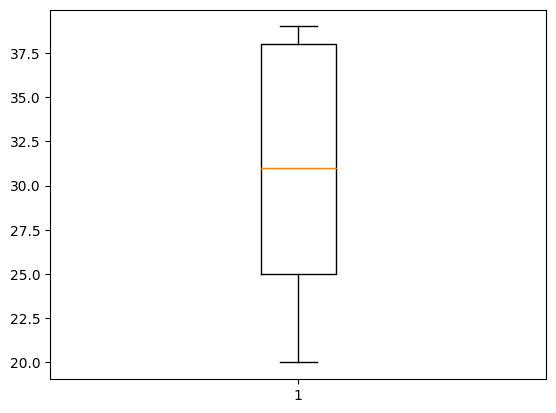

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])
plt.show()


In [ ]:
from scipy import stats
z_scores = stats.zscore(df['Age'])
z_scores

0     0.304936
1     1.045496
3    -1.620519
4     0.008712
5    -1.324295
6     1.193608
7     1.193608
8    -1.324295
9     0.008712
10    1.045496
11    0.601160
12   -1.620519
13    1.193608
14   -0.435623
16   -0.879959
17    0.008712
19    0.601160
Name: Age, dtype: float64

In [ ]:
df = df[(z_scores < 3) & (z_scores > -3)] #Remove Outliers
df

,Name,Sex,Age,Phone,Position_Level,Salary,Gender_code
0,David,F,33,1234567890,Analyst_1,42228,0
1,Alice,F,38,1234567890,Manager_1,$64697,0
3,David,M,20,NaN,Developer_1,$42287,1
4,Catherine,F,31,1234567890,Developer_2,$58945,0
5,Bob,M,22,1234567890,Manager_2,$41557,1
6,Alice,M,39,1234567890,Manager_2,$76833,1
7,Emily,F,39,1234567890,Manager_2,-1,0
8,Catherine,F,22,1234567890,Analyst_2,-1,0
9,Alice,F,31,1234567890,Analyst_3,65129,0
10,NaN,M,38,1234567890,Manager_2,60466,1


In [ ]:
df['Salary'].replace(-1, np.nan, inplace = True)

#Fill NAN with mean salary


df.head()

In [ ]:
df.info()

Check with ASSERT statement

The assert statement in Python is a debugging aid that tests a condition and triggers an error if the condition is not met. When it comes to DataFrames in Pandas, you can use assertions to check for NaN (Not a Number) values in your data.

In [ ]:
assert df.notna().all().all()


In [ ]:
df.dropna(inplace = True)
df

,Name,Sex,Age,Phone,Position_Level,Salary,Sex_code
0,Emily,M,27,1234567890,Analyst_1,62229.214286,1
2,David,F,31,1234567890,Analyst_1,74698.000000,0
3,Alice,F,27,1234567890,Manager_2,45774.000000,0
4,Emily,M,20,1234567890,Manager_2,66860.000000,1
5,Catherine,M,39,1234567890,Developer_3,48243.000000,1
7,David,M,23,1234567890,Developer_2,57487.000000,1
8,Emily,M,34,1234567890,Manager_1,56257.000000,1
9,Alice,M,28,1234567890,Manager_2,75307.000000,1
10,Emily,M,37,1234567890,Manager_1,62229.214286,1
12,Alice,F,23,1234567890,Manager_1,44807.000000,0


Save data as JSON

In [ ]:
df.to_json('data.json', orient='split', index=False)


In [ ]:
import json

# Open a file for reading
with open('data.json', 'r') as f:
    data = json.load(f)
    json_string = json.dumps(data)

# Now `data` is a Python dictionary containing the data from the JSON file
print(data['columns'])
for row in data['data']:
  print(row)


In [ ]:
#Save df to json format with orient='records' and store string value in json_string







```
Write a function that will take a json string like the above as a parameter, returning a pandas Series with the name as the index and the age as a value.
```



In [ ]:
import pandas as pd
import json

def create_series_from_json(json_string):
    # Load the JSON string into a Python object


    # Convert the Python object to a pandas DataFrame
    df = pd.DataFrame(json_data)

    # Create a pandas Series with 'Name' as index and 'Age' as values


    return series



# Create Series and display it
result_series = create_series_from_json(json_string)
print(result_series)


Name
Emily    27
David    31
Alice    27
dtype: int64




```
Calculate Average Salary: Write a function to calculate and return the average salary for a given Position_Level.
```




In [ ]:
data = {
    'Name': ['Emily', 'David', 'Alice', 'John'],
    'Position_Level': ['Analyst_1', 'Analyst_1', 'Manager_2', 'Developer_3'],
    'Salary': [62229, 74698, 45774, 48243]
}
df = pd.DataFrame(data)



def calculate_average_salary(df, position_level):
    # Filter the DataFrame to only include rows with the given Position_Level


    # Calculate the average salary for the filtered DataFrame


    return avg_salary



position_level = 'Analyst_1'
avg_salary = calculate_average_salary(df, position_level)
print(f"The average salary for {position_level} is {avg_salary}")


The average salary for Analyst_1 is 68463.5




```
Age Groups: Write a function that categorizes people into age groups ('Young', 'Adult', 'Senior') and returns the DataFrame with a new column named Age_Group.
```



In [ ]:
data = {
    'Name': ['Emily', 'David', 'Alice', 'John'],
    'Age': [27, 31, 55, 16],
    'Position_Level': ['Analyst_1', 'Analyst_1', 'Manager_2', 'Developer_3'],
    'Salary': [62229, 74698, 45774, 48243]
}
df = pd.DataFrame(data)


def categorize_age_groups(df):
    # Define the age bins and their corresponding labels (Create 2 lists bins, labels)



    # Create a new column 'Age_Group' based on the 'Age' column
    # df['Age_Group'] =

    return df



# Categorize age groups and display the DataFrame
df = categorize_age_groups(df)
print(df)


    Name  Age Position_Level  Salary Age_Group
0  Emily   27      Analyst_1   62229     Adult
1  David   31      Analyst_1   74698     Adult
2  Alice   55      Manager_2   45774    Senior
3   John   16    Developer_3   48243     Young
